<a href="https://colab.research.google.com/github/EbubeDelight/PyTorch_projects/blob/main/Ebube_03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [ ]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

2.1.0+cu121
cpu


## 1. What are 3 areas in industry where computer vision is currently being used?

### 1. Security and Surveillance
* In security and surveillance, computer vision is a cornerstone technology, facilitating the real-time monitoring and analysis of video feeds. It excels at detecting and recognizing faces, identifying suspicious activities, and tracking objects or individuals of interest. This capability enhances situational awareness across various environments, from airports and public transportation hubs to retail stores and smart cities. Furthermore, computer vision algorithms contribute to automated threat detection, intrusion detection, and perimeter security, bolstering overall safety and security measures.

### 2. Healthcare
* ***Medical Image Analysis***: In healthcare, computer vision is pivotal for diagnosing and treating diseases through medical imaging analysis. It efficiently detects anomalies in X-rays, MRIs, and CT scans, and assists in surgical planning by accurately segmenting organs and tissues. Beyond diagnostics, it supports telemedicine by enabling remote consultations and facilitates the analysis of patient data through digital health platforms. Moreover, computer vision ensures compliance with safety protocols in healthcare facilities by monitoring practices like hand hygiene and PPE usage.

### 3. Agriculture
* In agriculture, computer vision revolutionizes tasks like crop monitoring, yield estimation, pest detection, and precision farming. Drones armed with computer vision cameras provide aerial views of farmland, empowering farmers to assess crop health, pinpoint irrigation needs, and detect diseases or pests. Furthermore, computer vision drives the development of autonomous agricultural machinery, streamlining operations such as planting, harvesting, and pesticide application.


### 4. Autonomous Vehicles and Transportation
* ***Autonomous Vehicles (AVs) and Advanced Driver-assistance Systems (ADAS):*** Computer vision is at the core of autonomous vehicles (AVs) and advanced driver-assistance systems (ADAS) in transportation. AVs depend on computer vision to analyze their environment, identifying pedestrians, cyclists, vehicles, and road signs. Similarly, ADAS functions like lane departure warning and collision avoidance utilize computer vision algorithms to bolster safety and refine driving experiences.

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting in machine learning occurs when a model captures noise or random fluctuations in the training data, leading to poor performance on new, unseen data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.



You can address overfitting through the following:

* ***Model Simplification:*** Opt for simpler architectures or reduce parameters to prevent the model from capturing noise and irrelevant patterns in the data.

* ***Regularization:*** Introduce penalties on model parameters through techniques like L1 (Lasso), L2 (Ridge), or dropout to discourage overly complex solutions and encourage better generalization.

* ***Cross-Validation:*** Split the dataset into training, validation, and test sets, employing cross-validation techniques to evaluate model performance on different data subsets and ensure robustness.

* ***Early Stopping:*** Monitor the model's performance on a validation set during training and halt training when performance begins to degrade, preventing overfitting by stopping the model from memorizing noise.

* ***Data Augmentation:*** Expand the training dataset by applying transformations like rotation, translation, or cropping to the input data, increasing diversity and helping the model generalize better to new data.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import  datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

In [ ]:
train_data = datasets.MNIST(root= "data",
                            train = True,
                            transform = torchvision.transforms.ToTensor(),
                            target_transform = None,
                            download= True)

test_data = datasets.MNIST(root= "data",
                           train= False,
                           transform= ToTensor(),
                           target_transform= None,
                           download= True)

In [ ]:
print(f"Length of train_data is: {len(train_data)} \nLength of test_data is: {len(test_data)}")

Length of train_data is: 60000 
Length of test_data is: 10000


## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [ ]:
# See the third training example
image, label = train_data[2]
image.shape, label

(torch.Size([1, 28, 28]), 4)

In [ ]:
class_names = train_data.classes
class_to_idx = train_data.class_to_idx
class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

(-0.5, 27.5, 27.5, -0.5)

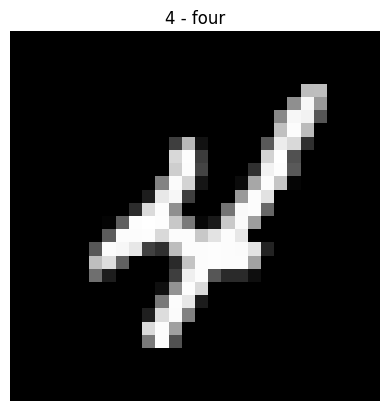

In [ ]:
# viewing only the tenth training example
import matplotlib.pyplot as plt
image, label = train_data[9]
plt.imshow(image.squeeze(), cmap= "gray")
plt.title(class_names[label])
plt.axis(False)

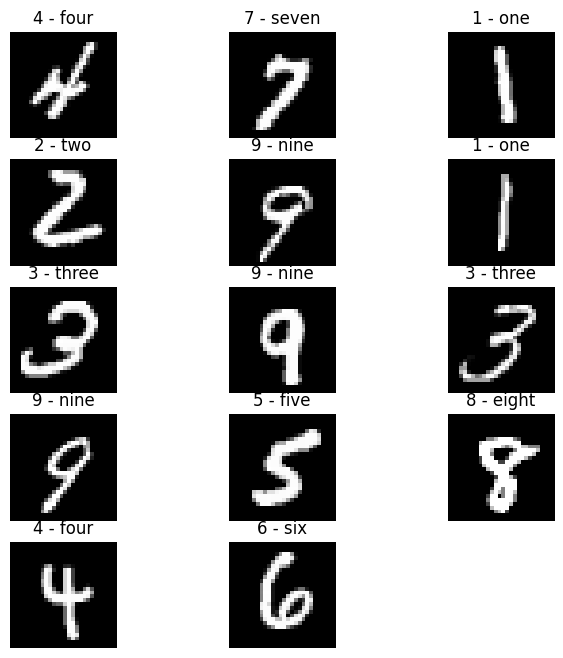

In [ ]:
# viewing 6 random training examples in a 3X2 matrix
torch.manual_seed(777)
fig= plt.figure(figsize= (8, 8))
rows, cols = 5, 3
for i in range(1, (rows*cols)):
  random_index = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_index]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [ ]:
# import Dataloader
from torch.utils.data import DataLoader

# Set up the batch size of the hyperparameter
BATCH_SIZE = 32

# Turn datasets to iterables (batches)
train_dataloader = DataLoader(dataset= train_data,
                              batch_size= BATCH_SIZE,
                              shuffle= True)

test_dataloader = DataLoader(dataset= test_data,
                             batch_size= BATCH_SIZE,
                             shuffle= False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7a4286276ec0>,
 <torch.utils.data.dataloader.DataLoader at 0x7a42866beef0>)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [ ]:
# Creating the TinyVGG model
class MNISTModel(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels= input_shape,
                  out_channels= hidden_units,
                  kernel_size= 3,
                  stride= 1,
                  padding= 1),
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units,
                  out_channels= hidden_units,
                  kernel_size= 3,
                  stride= 1,
                  padding= 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size= 2)
    )
    self.conv_block_2= nn.Sequential(
        nn.Conv2d(in_channels= hidden_units,
                  out_channels= hidden_units,
                  kernel_size= 3,
                  stride= 1,
                  padding= 1),
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units,
                  out_channels= hidden_units,
                  kernel_size= 3,
                  stride= 1,
                  padding= 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size= 2)
    )
    self.classifier= nn.Sequential(
        nn.Flatten(),
        nn.Linear(hidden_units*7*7,
                  output_shape)
    )
  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x


In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
model_0 = MNISTModel(input_shape= 1,
                     hidden_units = 10,
                     output_shape= len(class_names)).to(device)
model_0

MNISTModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs and see how long it takes on each.

In [ ]:
# Download helper_functions
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
 print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download...


In [ ]:
# Setting up loss, optimizer and accuracy functions
from helper_functions import accuracy_fn
loss_fn= nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_0.parameters(),
                            lr= 0.1)


In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """ Prints difference between start and end time. """
  total_time = end - start
  print(f"Train time on {device}: {total_time: .3f} seconds")
  return total_time

#### 9.1 Functionizing the training and testing steps

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  train_loss, train_acc = 0, 0

  model.train()
  for batch, (X, y) in enumerate(train_dataloader):
    X, y= X.to(device), y.to(device)

    # Forward pass
    y_pred = model_0(X)

    # 2. Calculate the  loss
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true = y,
                             y_pred = y_pred.argmax(dim=1))

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print out what is going on
    if batch % 400 == 0:
      print(f"Looked at {batch*len(X)}/ {len(train_dataloader.dataset)} samples")
  # Divide total train loss and accuracy by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [ ]:
### Testing
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device= device):
  test_loss, test_acc = 0, 0

  # Put model in eval mode
  model.eval()

  # Turn on inference mode
  with torch.inference_mode():
    for X, y in data_loader:
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # Forward Pass
      test_pred = model(X)

      # calculate loss and accuracy cumulatively
      test_loss += loss_fn(test_pred, y)

      test_acc += accuracy_fn(y_true= y, y_pred= test_pred.argmax(dim=1))


    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")



In [ ]:
%%time
torch.manual_seed(777)
# Calculate the training time
#from timeit import default_timer as timer
from tqdm.auto import tqdm
#train_time_start_on= timer

# Set epochs
epochs= 5

# Creating an optimization and evaluation loop using the train_step and test_test functions creted above
for epoch in tqdm (range(epochs)):
  print(f"Epoch: {epoch}\------")
  train_step(model = model_0,
             data_loader= train_dataloader,
             loss_fn= loss_fn,
             optimizer= optimizer,
             accuracy_fn= accuracy_fn,
             device = device)

  test_step(model = model_0,
            data_loader= test_dataloader,
            loss_fn= loss_fn,
            accuracy_fn= accuracy_fn,
            device = device)
#train_time_end_on= timer
#total_train_time_model_0 = print_train_time(start = train_time_start_on,
                                              #end = train_time_end_on,
                                              #device = str(next(model_0.parameters()).device))

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0\------
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples
Train loss: 0.26220 | Train acc: 91.18%
Test loss: 0.11724 | Test acc: 96.52%
Epoch: 1\------
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples
Train loss: 0.07194 | Train acc: 97.75%
Test loss: 0.05154 | Test acc: 98.35%
Epoch: 2\------
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples
Train loss: 0.05477 | Train acc: 98.36%
Test loss: 0.04110 | Test acc: 98.67%
Epoch: 3\------
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples
Train loss: 0.04654 | Train acc: 98.60%
Test loss: 0.03722 | Test acc: 98.70%
Epoch: 4\------
Look

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit= model(sample)

      pred_prob= torch.softmax(pred_logit.squeeze(), dim=0)

      pred_probs.append(pred_prob)
  # stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [ ]:
import random
# random.seed(777)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# view the third sample shape
test_samples[2].shape

torch.Size([1, 28, 28])

In [ ]:
#plt.imshow(test_samples[2].squeeze(), cmap= "gray")
#plt.title(class_names[test_labels[0]])

In [ ]:
pred_probs = make_predictions(model= model_0,
                              data= test_samples)

pred_probs[:5]

tensor([[4.6185e-07, 9.9988e-01, 4.1324e-05, 3.1809e-06, 5.0454e-05, 9.0476e-09,
         8.8712e-08, 2.4350e-05, 3.8206e-06, 1.8973e-08],
        [1.1201e-08, 4.0595e-12, 9.1051e-10, 4.1682e-08, 9.5436e-05, 5.5400e-07,
         4.7571e-11, 7.1621e-07, 1.5837e-05, 9.9989e-01],
        [7.1060e-11, 4.7854e-09, 1.0000e+00, 9.1931e-07, 7.9199e-08, 4.3986e-11,
         1.6210e-13, 6.0502e-09, 6.4021e-09, 7.0183e-11],
        [1.3220e-07, 7.1604e-07, 9.2923e-08, 4.9844e-05, 4.9752e-02, 1.7034e-06,
         1.6380e-10, 1.0300e-03, 1.7484e-04, 9.4899e-01],
        [3.2922e-06, 2.9267e-09, 2.1868e-09, 1.0953e-03, 6.7765e-07, 9.9873e-01,
         1.5484e-04, 2.0179e-10, 8.9190e-06, 4.4322e-06]])

In [ ]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([1, 9, 2, 9, 5, 0, 1, 6, 0])

In [ ]:
test_labels

[1, 9, 2, 9, 5, 0, 1, 6, 0]

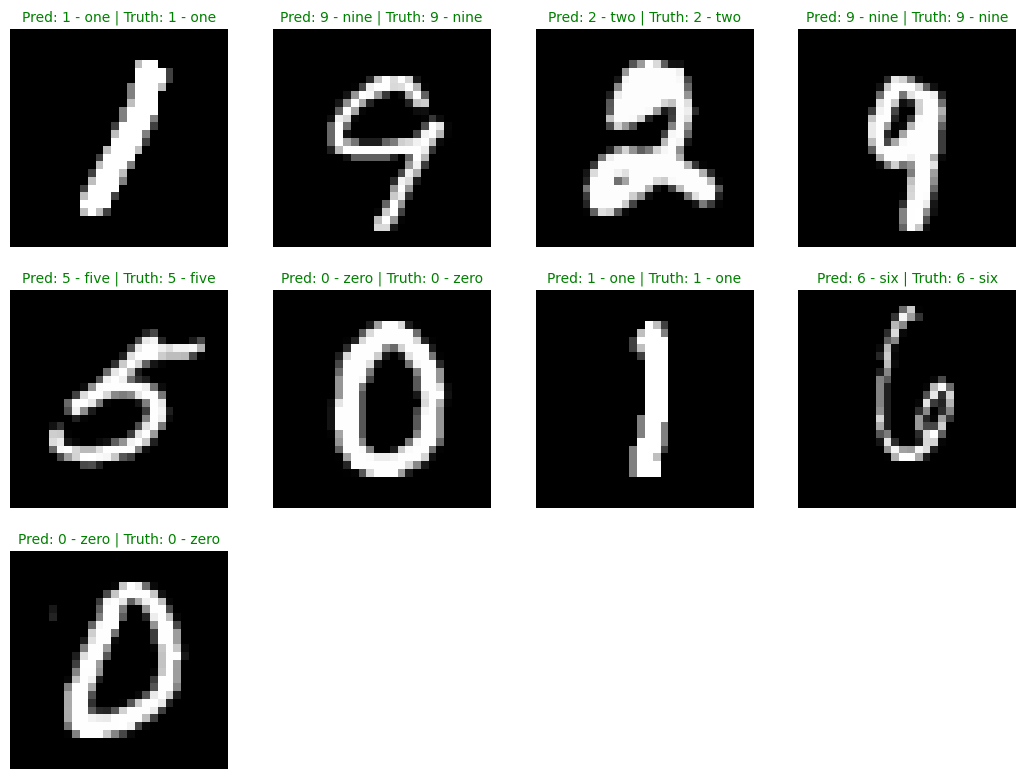

In [ ]:
# Plot predictions
plt.figure(figsize= (13,13))
rows= 4
cols = 4
for i , sample in enumerate (test_samples):
  plt.subplot(rows, cols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap= "gray")

  # Find the prediction label in textual form
  pred_label = class_names[pred_classes[i]]

  # Find the truth label in textual form
  truth_label = class_names[test_labels[i]]

  # Title of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    # Check for equality between pred_label and truth_label and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction is same as truth
  else:
    plt.title(title_text, fontsize=10, c="r") # red text if prediction is not same as truth
  plt.axis(False)



## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [ ]:
# import tqdm.auto
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds= []
model_0.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc= "Making predictions..."):
    # Send the data and targets to target device
    X, y = X.to(device), y.to(device)
    # do the forward pass
    y_logits = model_0(X)
    # Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logits.squeeze(), dim=0). argmax(dim=1)
    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([7, 2, 1, 0, 4, 1, 8, 9, 8, 9])

In [ ]:
len(y_pred_tensor)

10000

In [ ]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.1


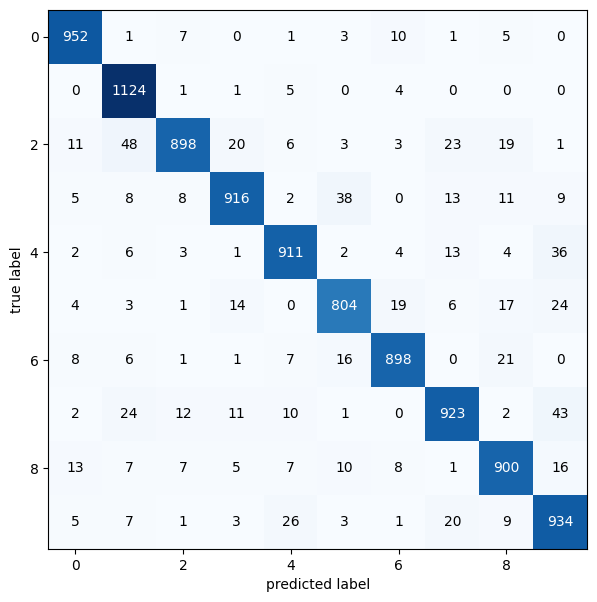

In [ ]:
import mlxtend
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup cconfusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes = len(class_names),  task='multiclass')
confmat_tensor = confmat(preds= y_pred_tensor,
                         target =test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(), # matploblib works with numpy
    figsize = (10,7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [ ]:
random_tensor = torch.rand([1, 3, 64, 64])
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [ ]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=64,
                       kernel_size=3,
                       stride=2,
                       padding=1)

print(f"Random tensor original shape: {random_tensor.shape}")
random_tensor_through_conv_layer = conv_layer(random_tensor)
print(f"Random tensor through conv layer shape: {random_tensor_through_conv_layer.shape}")

Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 64, 32, 32])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [ ]:
# Download FashionMNIST train & test
from torchvision import datasets
from torchvision import transforms

fashion_mnist_train = datasets.FashionMNIST(root=".",
                                            download=True,
                                            train=True,
                                            transform=transforms.ToTensor())

fashion_mnist_test = datasets.FashionMNIST(root=".",
                                           train=False,
                                           download=True,
                                           transform=transforms.ToTensor())

len(fashion_mnist_train), len(fashion_mnist_test)

(60000, 10000)

In [ ]:
# Get the class names of the Fashion MNIST dataset
fashion_mnist_class_names = fashion_mnist_train.classes
fashion_mnist_class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Turn FashionMNIST datasets into dataloaders
from torch.utils.data import DataLoader

fashion_mnist_train_dataloader = DataLoader(fashion_mnist_train,
                                            batch_size=32,
                                            shuffle=True)

fashion_mnist_test_dataloader = DataLoader(fashion_mnist_test,
                                           batch_size=32,
                                           shuffle=False)

len(fashion_mnist_train_dataloader), len(fashion_mnist_test_dataloader)

(1875, 313)

In [ ]:
# model_2 is the same architecture as MNIST_model
model_1 = MNISTModel(input_shape=1,
                      hidden_units=10,
                      output_shape=10).to(device)
model_1

MNISTModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# Setup loss and optimizer
from torch import nn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.01)

In [ ]:
# Setup metrics
from tqdm.auto import tqdm
from torchmetrics import Accuracy

acc_fn = Accuracy(task="multiclass", num_classes=len(fashion_mnist_class_names)).to(device)

# Setup training/testing loop
epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss, test_loss_total = 0, 0
  train_acc, test_acc = 0, 0

  ### Training
  model_1.train()
  for batch, (X_train, y_train) in enumerate(fashion_mnist_train_dataloader):
    X_train, y_train = X_train.to(device), y_train.to(device)

    # Forward pass and loss
    y_pred = model_1(X_train)
    loss = loss_fn(y_pred, y_train)
    train_loss += loss
    train_acc += acc_fn(y_pred, y_train)

    # Backprop and gradient descent
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # Adjust the loss/acc (find the loss/acc per epoch)
  train_loss /= len(fashion_mnist_train_dataloader)
  train_acc /= len(fashion_mnist_train_dataloader)

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(fashion_mnist_test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)

      # Forward pass and loss
      y_pred_test = model_1(X_test)
      test_loss = loss_fn(y_pred_test, y_test)
      test_loss_total += test_loss

      test_acc += acc_fn(y_pred_test, y_test)

    # Adjust the loss/acc (find the loss/acc per epoch)
    test_loss /= len(fashion_mnist_test_dataloader)
    test_acc /= len(fashion_mnist_test_dataloader)

  # Print out what's happening
  print(f"Epoch: {epoch} | Train loss: {train_loss:.3f} | Train acc: {train_acc:.2f} | Test loss: {test_loss_total:.3f} | Test acc: {test_acc:.2f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.308 | Train acc: 0.52 | Test loss: 213.038 | Test acc: 0.73
Epoch: 1 | Train loss: 0.520 | Train acc: 0.81 | Test loss: 168.657 | Test acc: 0.80
Epoch: 2 | Train loss: 0.429 | Train acc: 0.85 | Test loss: 136.578 | Test acc: 0.85
Epoch: 3 | Train loss: 0.393 | Train acc: 0.86 | Test loss: 121.705 | Test acc: 0.86
Epoch: 4 | Train loss: 0.367 | Train acc: 0.87 | Test loss: 125.836 | Test acc: 0.85


In [ ]:
# Make predictions with trained model_2
test_preds = []
model_1.eval()
with torch.inference_mode():
  for X_test, y_test in tqdm(fashion_mnist_test_dataloader):
    y_logits = model_1(X_test.to(device))
    y_pred_probs = torch.softmax(y_logits, dim=1)
    y_pred_labels = torch.argmax(y_pred_probs, dim=1)
    test_preds.append(y_pred_labels)
test_preds = torch.cat(test_preds).cpu() # matplotlib likes CPU
test_preds[:10], len(test_preds)

  0%|          | 0/313 [00:00<?, ?it/s]

(tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]), 10000)

In [ ]:
# Get wrong prediction indexes
import numpy as np
wrong_pred_indexes = np.where(test_preds != fashion_mnist_test.targets)[0]
print(wrong_pred_indexes)
len(wrong_pred_indexes)

[  12   21   23 ... 9979 9985 9991]


1479

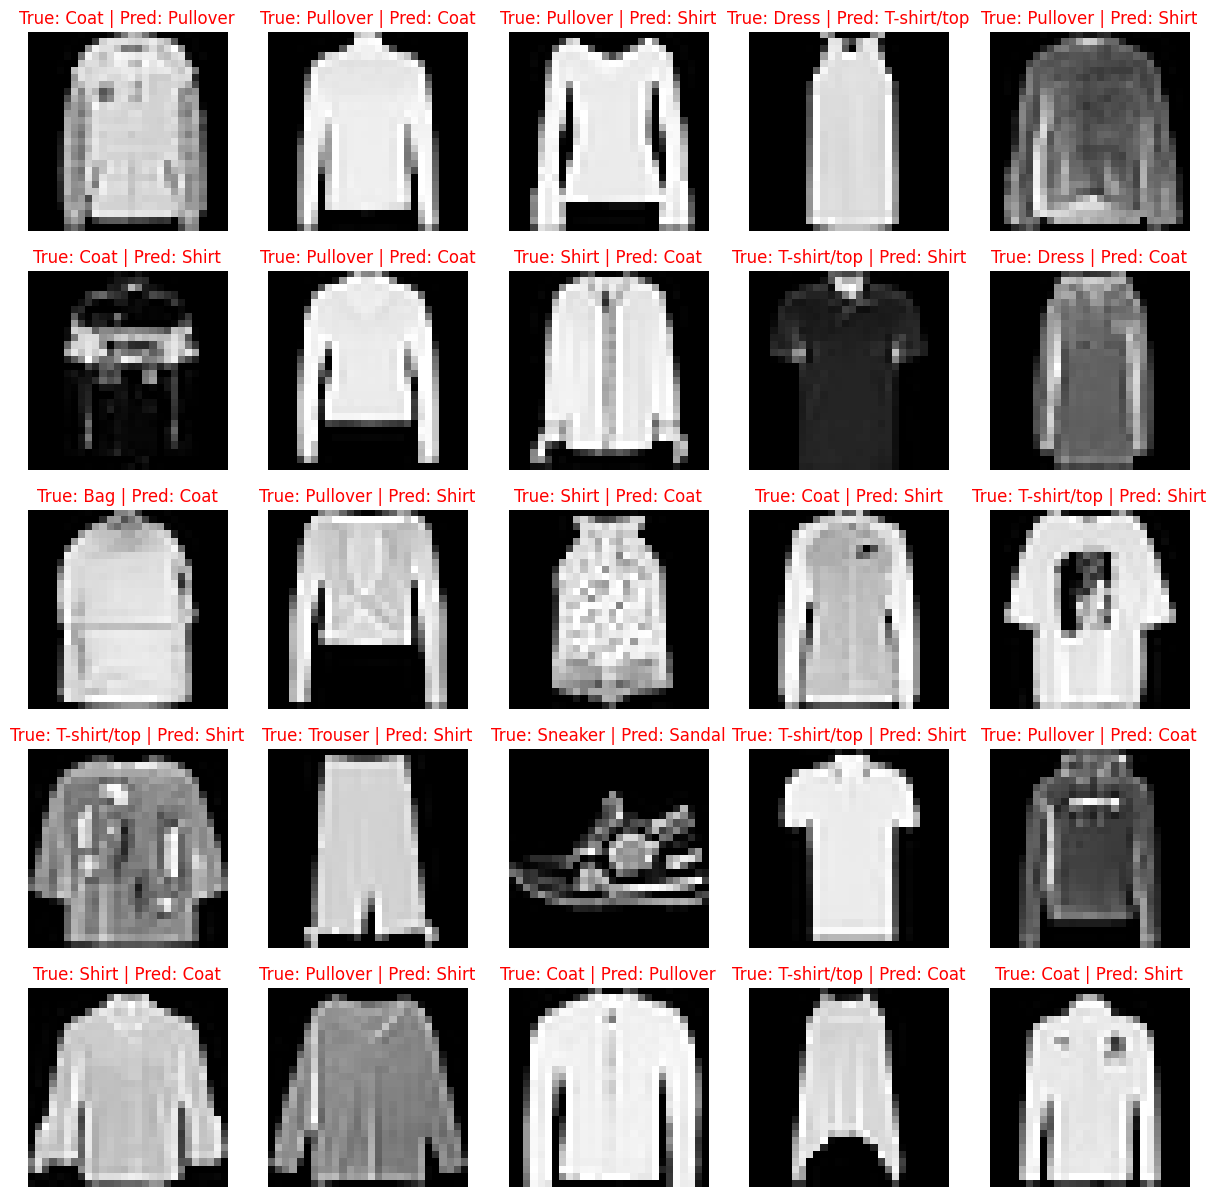

In [ ]:
# Select random 9 wrong predictions and plot them
import random
random_selection = random.sample(list(wrong_pred_indexes), k=25)

plt.figure(figsize=(15, 15))
for i, idx in enumerate(random_selection):
  # Get true and pred labels
  true_label = fashion_mnist_class_names[fashion_mnist_test[idx][1]]
  pred_label = fashion_mnist_class_names[test_preds[idx]]

  # Plot the wrong prediction with its original label
  plt.subplot(5, 5, i+1)
  plt.imshow(fashion_mnist_test[idx][0].squeeze(), cmap="gray")
  plt.title(f"True: {true_label} | Pred: {pred_label}", c="r")
  plt.axis(False);


Considering the visual represntations of the images and their labels, I would say the error is due to both data and modelling error.

* Data error: This is firstly because of confusing labelling (eg. T-shirt/ top and t-shirt) and overlapping of the physical features of some of the items (eg. Pullover and Long-sleeve T-shirt).
* Modelling error: The model acted confused at some point. For example: by predicting an item that is clearly identifiable (by physical features and label) as a Sneaker to be a Sandal.